## Unsupervised Learning Final Project
This was my final project for the Coursera course on unsupervised learning, as part of my IBM Machine Learning certification program. Apologies if this notebook gets too exploratory at times, but I think that the conclusions are concise and clear.

### 1. Main objective of the analysis that also specifies whether your model will be focused on clustering or dimensionality reduction and the benefits that your analysis brings to the business or stakeholders of this data.

The main objective of the analysis will be to understand customers profile considering different attributes mainly grouped by basic demographic characteristics, products consumed, purchase channel of preferrence, reaction to promotions, etc. 
Since the aim is to achieve some kind of segmentation in order to plan marketing campaigns, I will be focusing on clustering.
The benefits the analysis would bring to the business are centered on understanding customers and work strategically on customized offers based on their specific needs, behaviors and concerns.


### 2. Brief description of the data set you chose, a summary of its attributes, and an outline of what you are trying to accomplish with this analysis.



The dataset "Marketing Campaign" can be downloaded from https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis?select=marketing_campaign.csv

Attributes

People

* ID: Customer 's unique identifier
* Year_Birth: Customer's birth year
* Education: Customer's education level
* Marital_Status: Customer's marital status
* Income: Customer's yearly household income
* Kidhome: Number of children in customer's household
* Teenhome: Number of teenagers in customer's household
* Dt_Customer: Date of customer's enrollment with the company
* Recency: Number of days since customer's last purchase
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise

Products

* MntWines: Amount spent on wine in last 2 years
* MntFruits: Amount spent on fruits in last 2 years
* MntMeatProducts: Amount spent on meat in last 2 years
* MntFishProducts: Amount spent on fish in last 2 years
* MntSweetProducts: Amount spent on sweets in last 2 years
* MntGoldProds: Amount spent on gold in last 2 years

Promotion

* NumDealsPurchases: Number of purchases made with a discount
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

Place

* NumWebPurchases: Number of purchases made through the company’s website
* NumCatalogPurchases: Number of purchases made using a catalogue
* NumStorePurchases: Number of purchases made directly in stores
* NumWebVisitsMonth: Number of visits to company’s website in the last month

With this analysis I will try to find an optimal number of customer segments and find common patterns that differentiate one from the other.

### 3. Brief summary of data exploration and actions taken for data cleaning orfeature engineering.


* It was analyzed **null values**, only Income had some Nan values which were imputed with average income according to education level
* **Marital Status** had some rare status such as Absurd, YOLO and Alone which were assumed to be Single (only 7 observations)
* Two columns that took only the value of zero (Z_costcontact,Z_revenue), **were removed** for not adding information
* Categorical features were **hot encoded** (Marital Status) and **converted to Ordinal** (Education)
* **New features** were created from the existing ones:
    1. Age
    2. Days as a customer
    3. KidsnTeens (number of kids and teens in the family)
    4. Total Campaigns Accepted
* **Outliers** were analyzed with boxplots and 13 observations were removed
* It was used a heatmap of correlations, pairplots and scatterplots to explore the data an analyze some potential relationships.
    * Acceptance of campaigns seems to increase as income is higher
    * The amount of purchases is highly correlated with income
    * As the number of kids and teens increases the importance of discounts/deals is higher for the customer

### Analyze null values and dtypes

In [133]:
import pandas as pd
df=pd.read_csv('marketing_campaign.csv',sep='\t')

In [134]:
pd.set_option('display.max_columns', None)
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [135]:
df.shape

(2240, 29)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [137]:
df[df['Income'].isnull()]

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
10    15-11-2013       11         5          5                6   
27    20-02-2013       19         5          1                3   
43    05-11-2013       80        81         11               50   
48    01-01-2014       96        48          5               48   
58    17-06-2013       57        11          3               22   
71    14-09-2012       25        25          3               43   
90    19-11-2012        4       230         42              192   
91    27-05-2014       45         7          0                8   
92    23-11-2013       87       445         37              359   
128   11-07-2013       23       352          0               27   
133   11-08-2013       96       231         65              196   
312   03-06-2013       69       861        138              461   
319   23-08-2013       67       738         20              172   
1379  01-04-2013       39       187          5               65   
1382  03-09-2012       87        19          4               12   
1383  12-01-2014       49         5          1                9   
1386  02-03-2014       17        25          1               13   
2059  18-05-2013       52       375         42               48   
2061  31-05-2013       82        23          0               15   
2078  03-03-2013       82        71          1               16   
2079  23-06-2013       83       161          0               22   
2081  18-10-2013       95       264          0               21   
2084  30-10-2013       75       532        126              490   
2228  12-08-2012       53        32          2             1607   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
10                  0                 2             1                  1   
27                  3               263           362                  0   
43                  3                 2            39                  1   
48 

<AxesSubplot:>

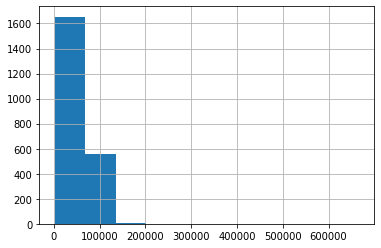

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns

df['Income'].hist()

In [139]:
inc_class=pd.DataFrame(df.groupby('Education')['Income'].mean())

In [140]:
inc_class

Income
Education               
2n Cycle    47633.190000
Basic       20306.259259
Graduation  52720.373656
Master      52917.534247
PhD         56145.313929

In [141]:
nulls = df.loc[df.Income.isnull(), 'Education']
df.loc[df.Income.isnull(), 'Income'] = inc_class.loc[nulls].values

In [142]:
df['Marital_Status'].value_counts() # I will assume Alone, Absurd and YOLO to be Single

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [143]:
mapping={'Married':'Married','Together':'Together','Single':'Single','Divorced':'Divorced','Widow':'Widow','Alone':'Single','Absurd':'Single','YOLO':'Single'}

In [144]:
df['Marital_Status']=df['Marital_Status'].map(mapping)

In [145]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      487
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

### Remove columns that do not add value

In [146]:
df['Z_CostContact'].value_counts()

3    2240
Name: Z_CostContact, dtype: int64

In [147]:
df['Z_Revenue'].value_counts()

11    2240
Name: Z_Revenue, dtype: int64

In [148]:
df=df.drop(['Z_CostContact','Z_Revenue'],axis=1)

### Convert categorical features to dummy and ordinal

In [214]:
dum=pd.get_dummies(df,columns=['Marital_Status'])

In [219]:
educ_dict={'Basic':1,'2n Cycle':2,'Graduation':3,'Master':4,'PhD':5}
dum['Education']=dum.Education.map(educ_dict)

### Manage date features and create new features: 'Age' and 'Days as customer'

In [221]:
dum['Dt_Customer_asdate']=pd.to_datetime(dum['Dt_Customer'],dayfirst=True)
# the date of this dataset is unkown I assume creation date as 2015 given that the maximum customer creation date is 2014.

In [222]:
import datetime
d = datetime.date(2015,1 , 1)
dum['date']=pd.Series(d)
dum=dum.fillna(d)

In [223]:
dum['date']=pd.to_datetime(dum['date'])
dum['Age']=pd.DatetimeIndex(dum['date']).year-dum['Year_Birth']

In [224]:
dum['customer_history']=dum['date']-dum['Dt_Customer_asdate']

In [225]:
dum['days_as_customer']=pd.to_timedelta(dum.customer_history, errors='coerce').dt.days

### Remove unnecessary features

In [163]:
dum.duplicated().sum()

0

In [226]:
cols=['Dt_Customer','Year_Birth','ID','Dt_Customer_asdate','date','customer_history']
dum=dum.drop(cols,axis=1)

In [227]:
dum.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          3  58138.0        0         0       58       635         88   
1          3  46344.0        1         1       38        11          1   
2          3  71613.0        0         0       26       426         49   
3          3  26646.0        1         0       26        11          4   
4          5  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Marital_Status_Divorced  \
0             0         0         1                        0   
1             0         0         0                        0   
2             0         0         0                        0   
3             0         0         0                        0   
4             0         0         0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Education_ord  Age  days_as_customer  
0                     0              3   58               849  
1                     0              3   61               299  
2                     0              3   50               498  
3                     0              3   31               325  
4                     0              5   34               347

### Check and remove outliers

In [228]:
non_dummy_features=[]
for col in dum:
    length=len(dum[col].value_counts())
    if length>=3:
        non_dummy_features.append(col)

In [229]:
non_dummy_features

['Education',
 'Income',
 'Kidhome',
 'Teenhome',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Education_ord',
 'Age',
 'days_as_customer']

<AxesSubplot:>

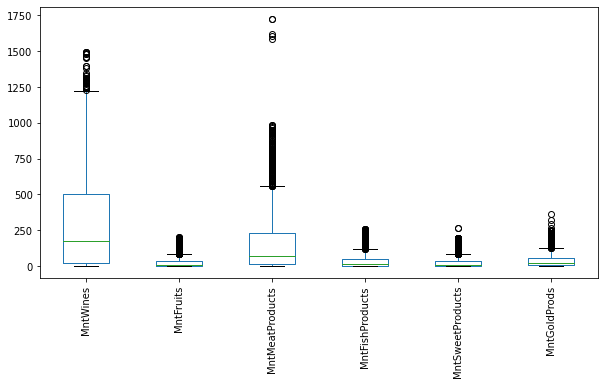

In [230]:
import matplotlib.pyplot as plt
dum.boxplot(grid=False,column=['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
 'MntGoldProds'],rot=90,figsize=(10,5))

In [231]:
dum[dum['MntMeatProducts']>1250]

Education     Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
21            3    2447.00        1         0       42         1          1   
164           5  157243.00        0         1       98        20          2   
687           5  160803.00        0         0       21        55         16   
1653          3  157146.00        0         0       13         1          0   
2228          2   47633.19        0         0       53        32          2   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
21               1725                1                 1             1   
164              1582                1                 2             1   
687              1622               17                 3             4   
1653             1725                2                 1             1   
2228             1607               12                 4            22   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
21                   15                0                   28   
164                  15                0                   22   
687                  15                0                   28   
1653                  0                0                   28   
2228                  0                0                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
21                    0                  1             0             0   
164                   0                  0             0             0   
687                   1                  0             0             0   
1653                  0                  1             0             0   
2228                  1                  0             0             1   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
21               0             0             0         0         0   
164              0             0             0         0         0   
687              0             0             0         0         0   
1653             0             0             0         0         0   
2228             0             0             0         0         0   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
21                          0                       1                      0   
164                         0                       1                      0   
687                         0                       1                      0   
1653                        0                       0                      0   
2228                        0                       0                      0   

      Marital_Status_Together  Marital_Status_Widow  Education_ord  Age  \
21                          0                     0              3   36   
164                         0                     0              5   42   
687                         0                     0              5   33   
1653                        1                     0              3   38   
2228                        1                     0              2   37   

      days_as_customer  
21                 725  
164                306  
687                880  
1653               612  
2228               872

<AxesSubplot:>

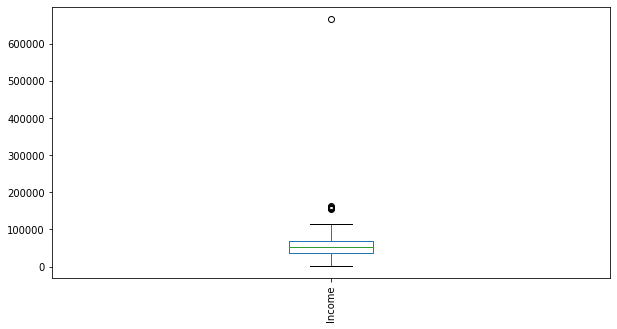

In [232]:
import matplotlib.pyplot as plt
short_df.boxplot(grid=False,column=['Income'],rot=90,figsize=(10,5))

In [233]:
dum[dum['Income']>300000]

Education    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
2233          3  666666.0        1         0       23         9         14   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
2233               18                8                 1            12   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
2233                  4                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
2233             0             0             0         0         0   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
2233                        0                       0                      0   

      Marital_Status_Together  Marital_Status_Widow  Education_ord  Age  \
2233                        1                     0              3   38   

      days_as_customer  
2233               578

<AxesSubplot:>

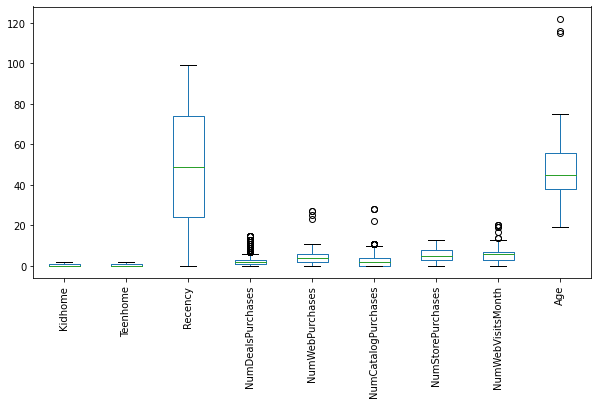

In [100]:
import matplotlib.pyplot as plt
short_df.boxplot(grid=False,column=['Kidhome',
 'Teenhome',
 'Recency',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Age'],rot=90,figsize=(10,5))

In [234]:
dum[dum['Age']>80]

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
192          2  36640.0        1         0       99        15          6   
239          2  60182.0        0         1       23         8          0   
339          5  83532.0        0         0       36       755        144   

     MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
192                8                7                 4            25   
239                5                7                 0             2   
339              562              104                64           224   

     NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
192                  1                2                    1   
239                  1                1                    0   
339                  1                4                    6   

     NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
192                  2                  5             0             0   
239                  2                  4             0             0   
339                  4                  1             0             0   

     AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
192             0             0             0         1         0   
239             0             0             0         0         0   
339             1             0             0         0         0   

     Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
192                        1                       0                      0   
239                        0                       0                      1   
339                        0                       0                      0   

     Marital_Status_Together  Marital_Status_Widow  Education_ord  Age  \
192                        0                     0              2  115   
239                        0                     0              2  122   
339                        1                     0              5  116   

     days_as_customer  
192               462  
239               229  
339               462

In [235]:
dum[dum['NumCatalogPurchases']>20]

Education    Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
21            3    2447.0        1         0       42         1          1   
164           5  157243.0        0         1       98        20          2   
687           5  160803.0        0         0       21        55         16   
1653          3  157146.0        0         0       13         1          0   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
21               1725                1                 1             1   
164              1582                1                 2             1   
687              1622               17                 3             4   
1653             1725                2                 1             1   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
21                   15                0                   28   
164                  15                0                   22   
687                  15                0                   28   
1653                  0                0                   28   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
21                    0                  1             0             0   
164                   0                  0             0             0   
687                   1                  0             0             0   
1653                  0                  1             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
21               0             0             0         0         0   
164              0             0             0         0         0   
687              0             0             0         0         0   
1653             0             0             0         0         0   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
21                          0                       1                      0   
164                         0                       1                      0   
687                         0                       1                      0   
1653                        0                       0                      0   

      Marital_Status_Together  Marital_Status_Widow  Education_ord  Age  \
21                          0                     0              3   36   
164                         0                     0              5   42   
687                         0                     0              5   33   
1653                        1                     0              3   38   

      days_as_customer  
21                 725  
164                306  
687                880  
1653               612

In [236]:
dum[dum['NumWebPurchases']>20]

Education         Income  Kidhome  Teenhome  Recency  MntWines  \
27            3   52720.373656        1         0       19         5   
1806          5    7144.000000        0         2       92        81   
1898          5  113734.000000        0         0        9         6   
1975          3    4428.000000        0         1        0        16   

      MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
27            1                3                3               263   
1806          4               33                5                 2   
1898          2                3                1               262   
1975          4               12                2                 4   

      MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
27             362                  0               27                    0   
1806           291                  0               23                    1   
1898             3                  0               27                    0   
1975           321                  0               25                    0   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
27                    0                  1             0             0   
1806                  1                  0             0             0   
1898                  0                  1             0             0   
1975                  0                  1             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
27               0             0             0         0         0   
1806             0             0             0         0         0   
1898             0             0             0         0         0   
1975             0             0             0         0         0   

      Marital_Status_Divorced  Marital_Status_Married  Marital_Status_Single  \
27                          0                       0                      1   
1806                        0                       0                      1   
1898                        0                       0                      1   
1975                        0                       1                      0   

      Marital_Status_Together  Marital_Status_Widow  Education_ord  Age  \
27                          0                     0              3   29   
1806                        0                     0              5   49   
1898                        0                     0              5   70   
1975                        0                     0              3   46   

      days_as_customer  
27                 680  
1806               390  
1898               218  
1975               453

In [237]:
dum.shape

(2240, 31)

In [238]:
indeces_to_remove=[21,164,687,1653,27,1806,1898,1975,192,239,339,2233,2228]
new_df=dum.drop(indeces_to_remove,axis=0)

In [239]:
new_df['KidsnTeens']=new_df['Kidhome']+new_df['Teenhome']
new_df['Tot_camp_accp']=new_df['AcceptedCmp3']+new_df['AcceptedCmp4']+new_df['AcceptedCmp5']+new_df['AcceptedCmp1']+new_df['AcceptedCmp2']+new_df['Response']

In [240]:
new_df.shape

(2227, 33)

In [241]:
new_df['Tot_camp_accp'].value_counts()

0    1620
1     368
2     142
3      51
4      36
5      10
Name: Tot_camp_accp, dtype: int64

<AxesSubplot:>

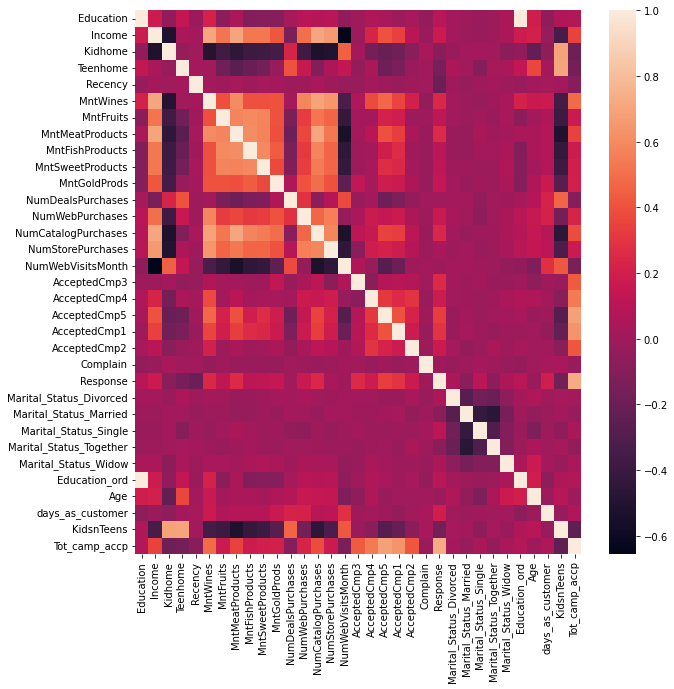

In [242]:
cm=new_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cm)

In [199]:
new_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Education_2n Cycle',
       'Education_Basic', 'Education_Graduation', 'Education_Master',
       'Education_PhD', 'Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together',
       'Marital_Status_Widow', 'Age', 'days_as_customer', 'KidsnTeens',
       'Tot_camp_accp'],
      dtype='object')

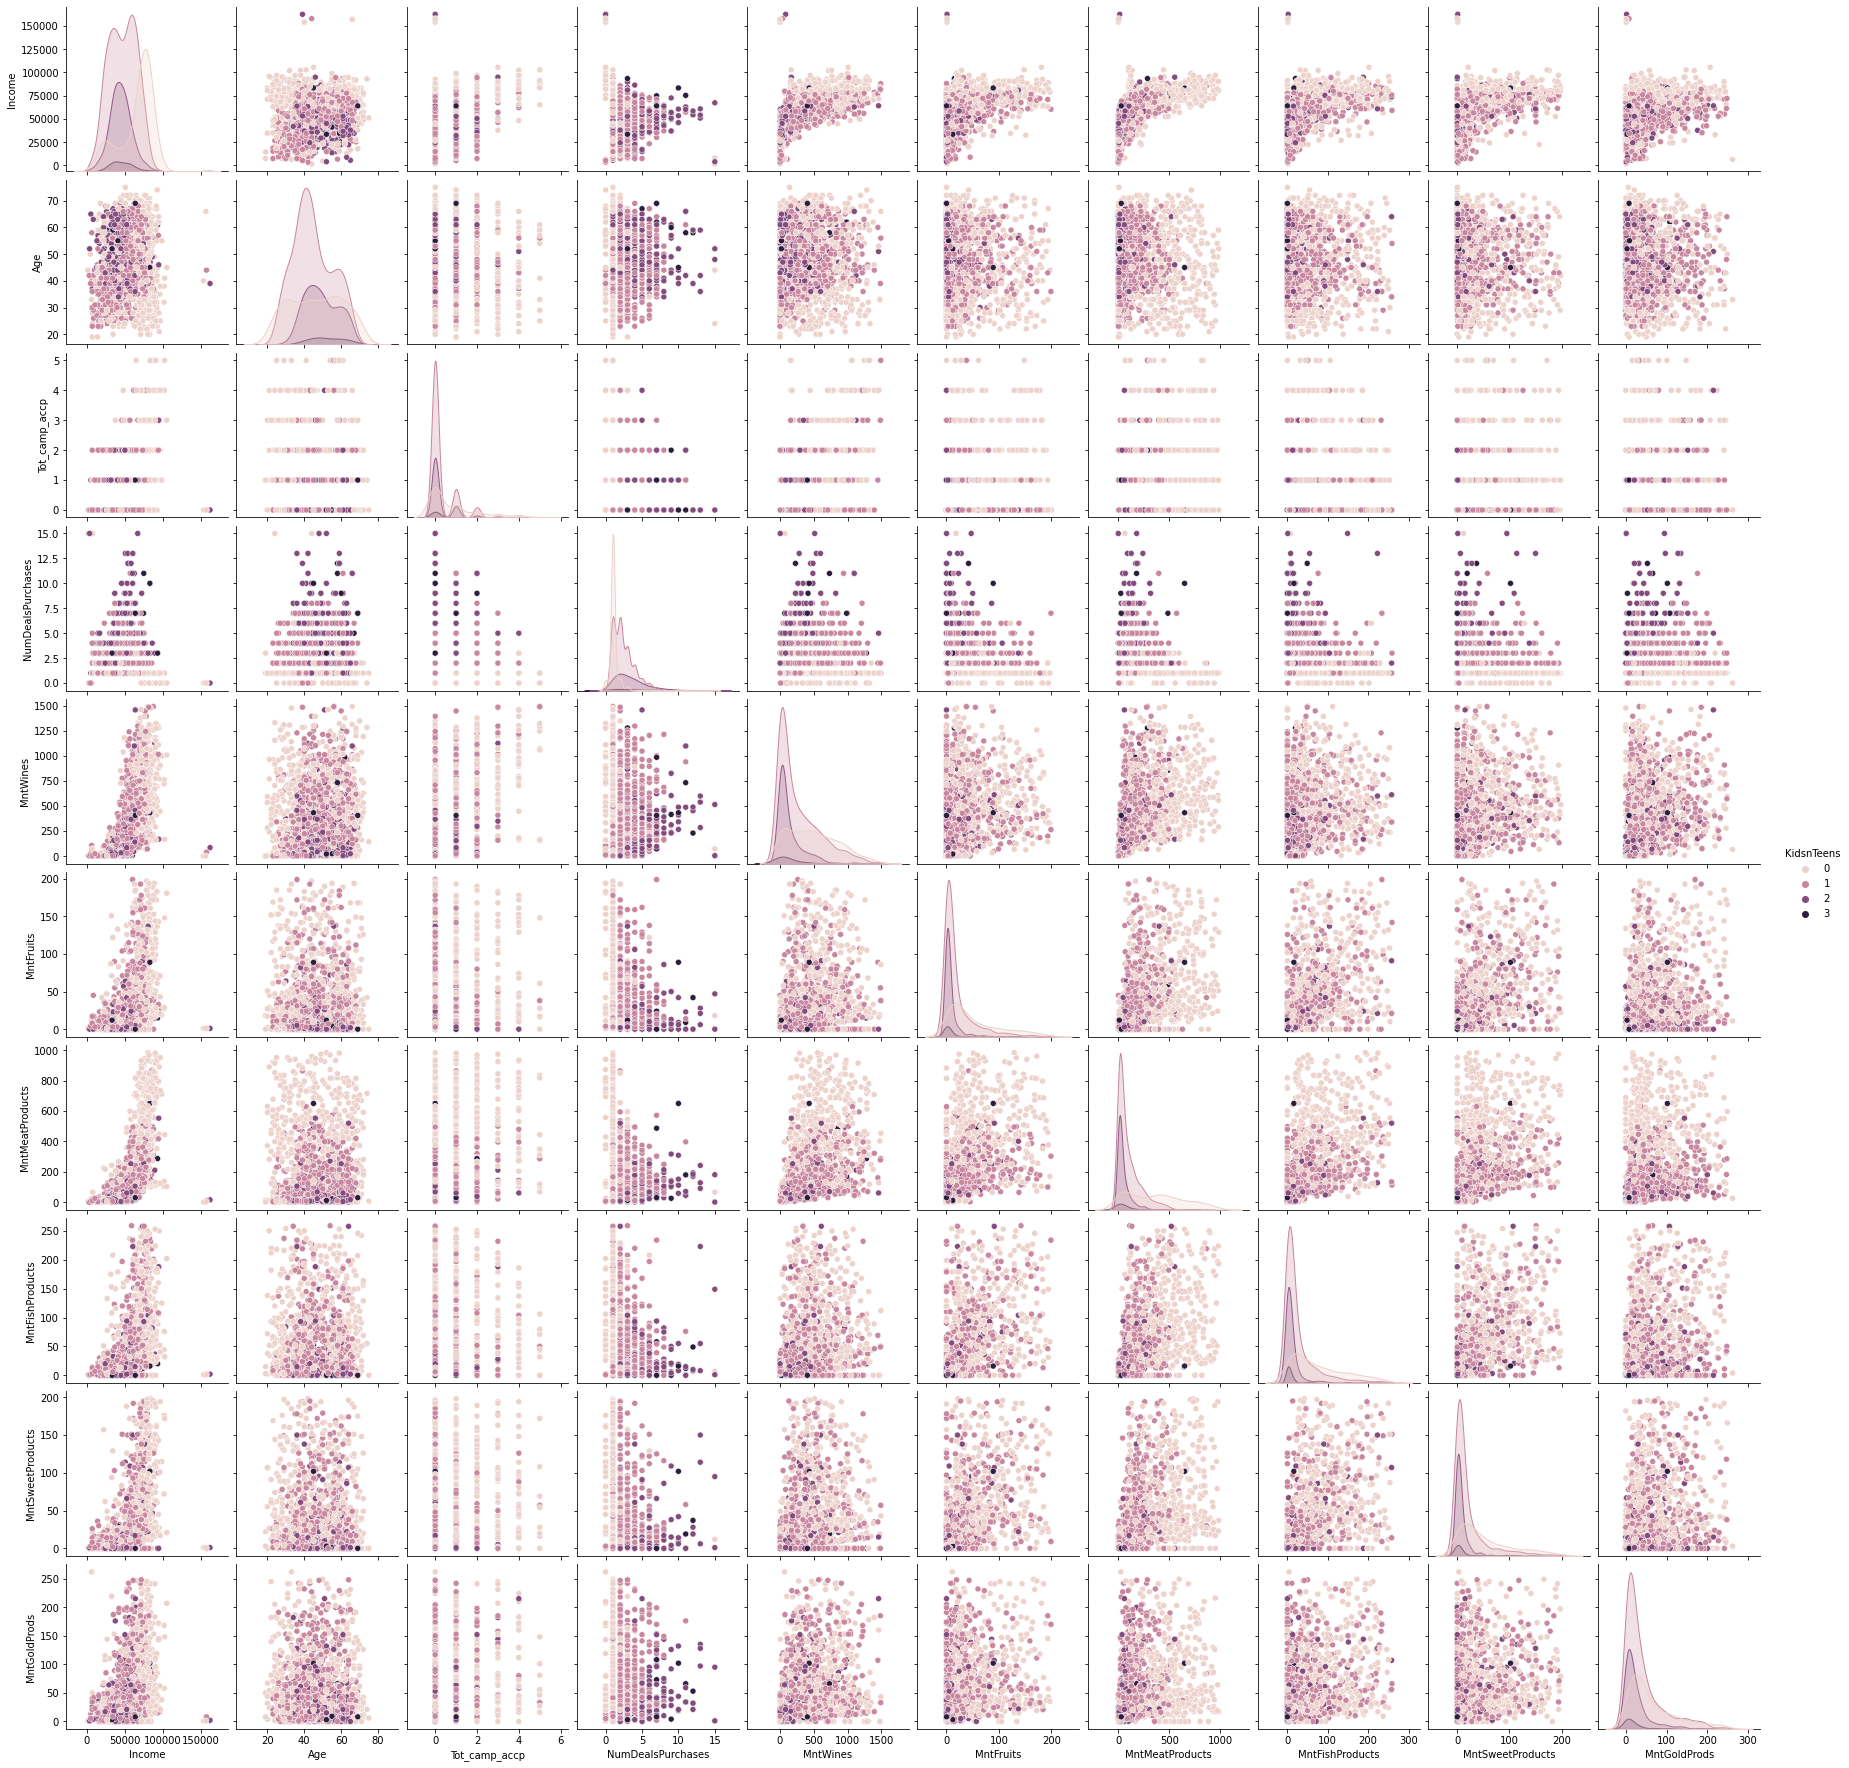

In [243]:
cols=['Income', 'KidsnTeens','Age','Tot_camp_accp','NumDealsPurchases' ,'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds']
sns.pairplot(new_df[cols],hue='KidsnTeens')

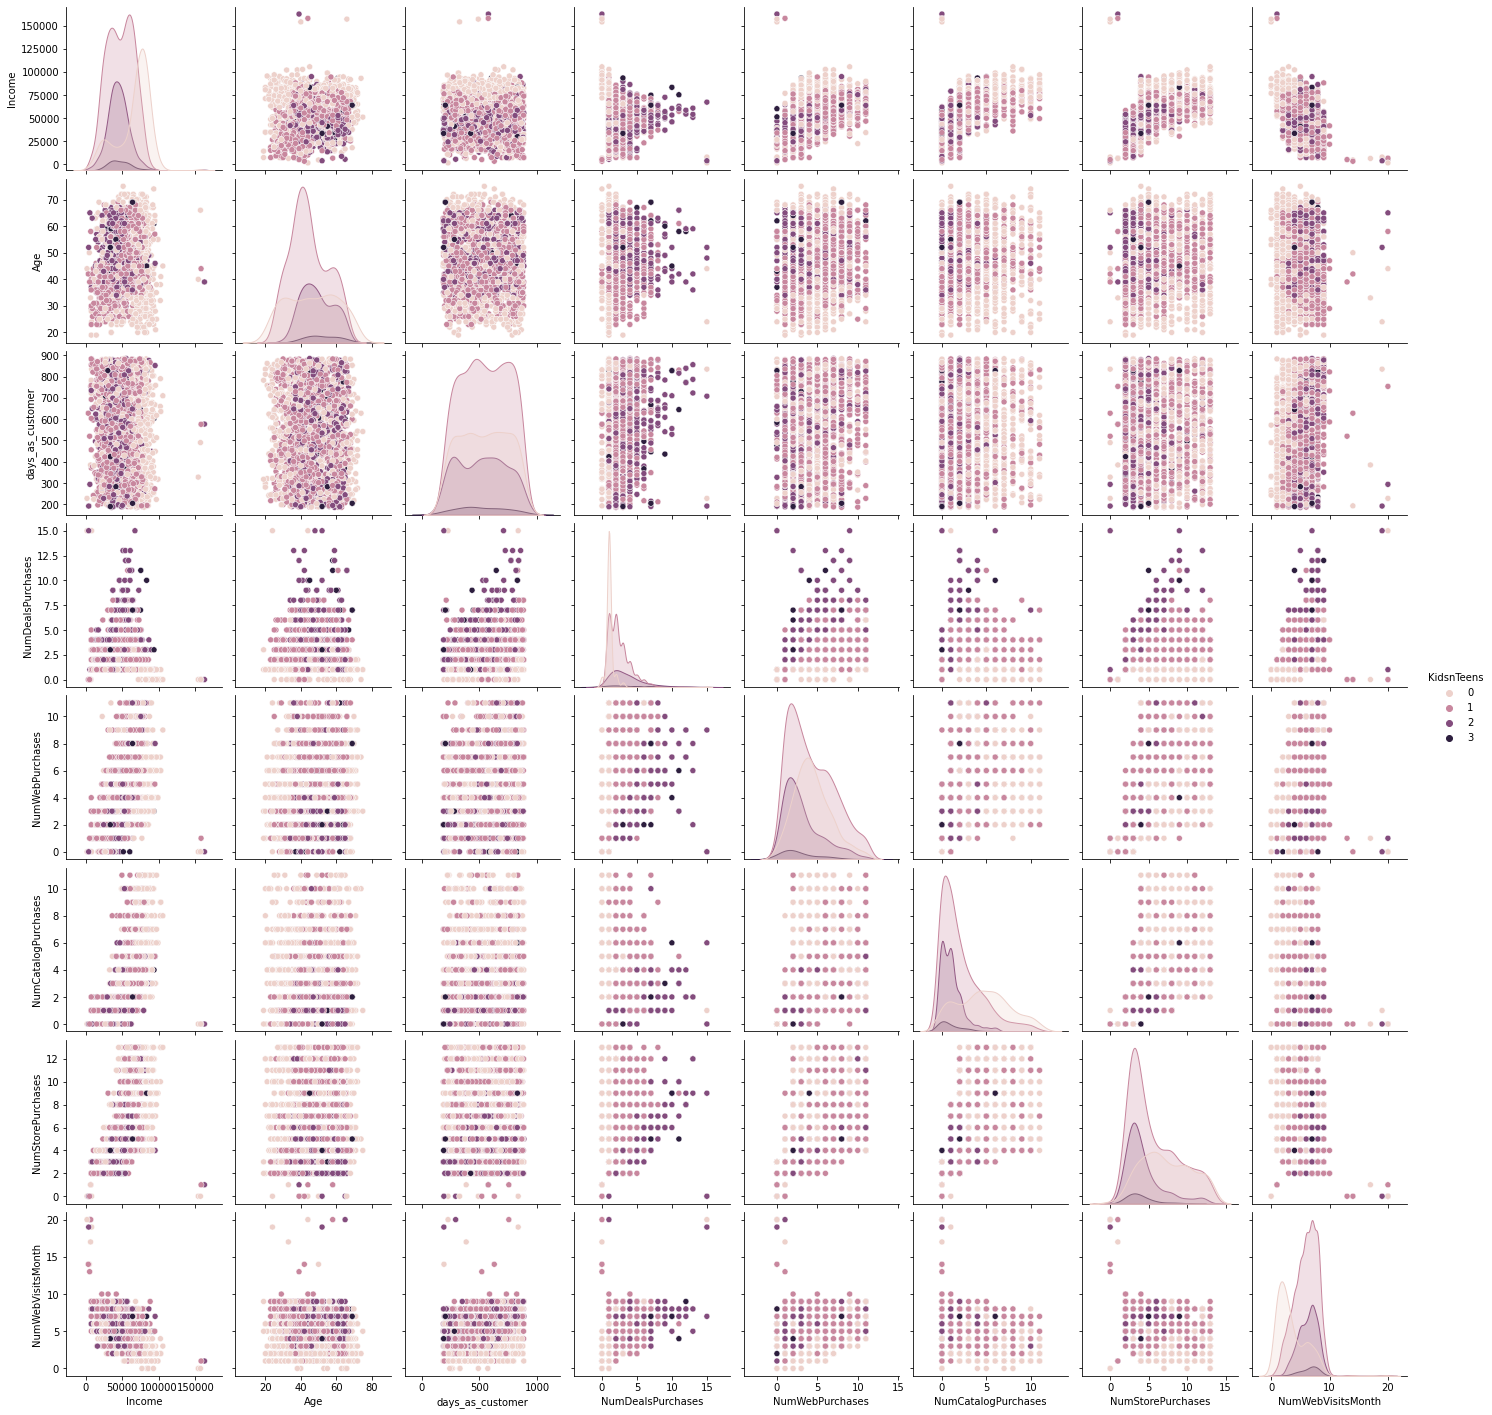

In [194]:
cols=['Income', 'KidsnTeens','Age', 'days_as_customer','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']
sns.pairplot(new_df[cols],hue='KidsnTeens')

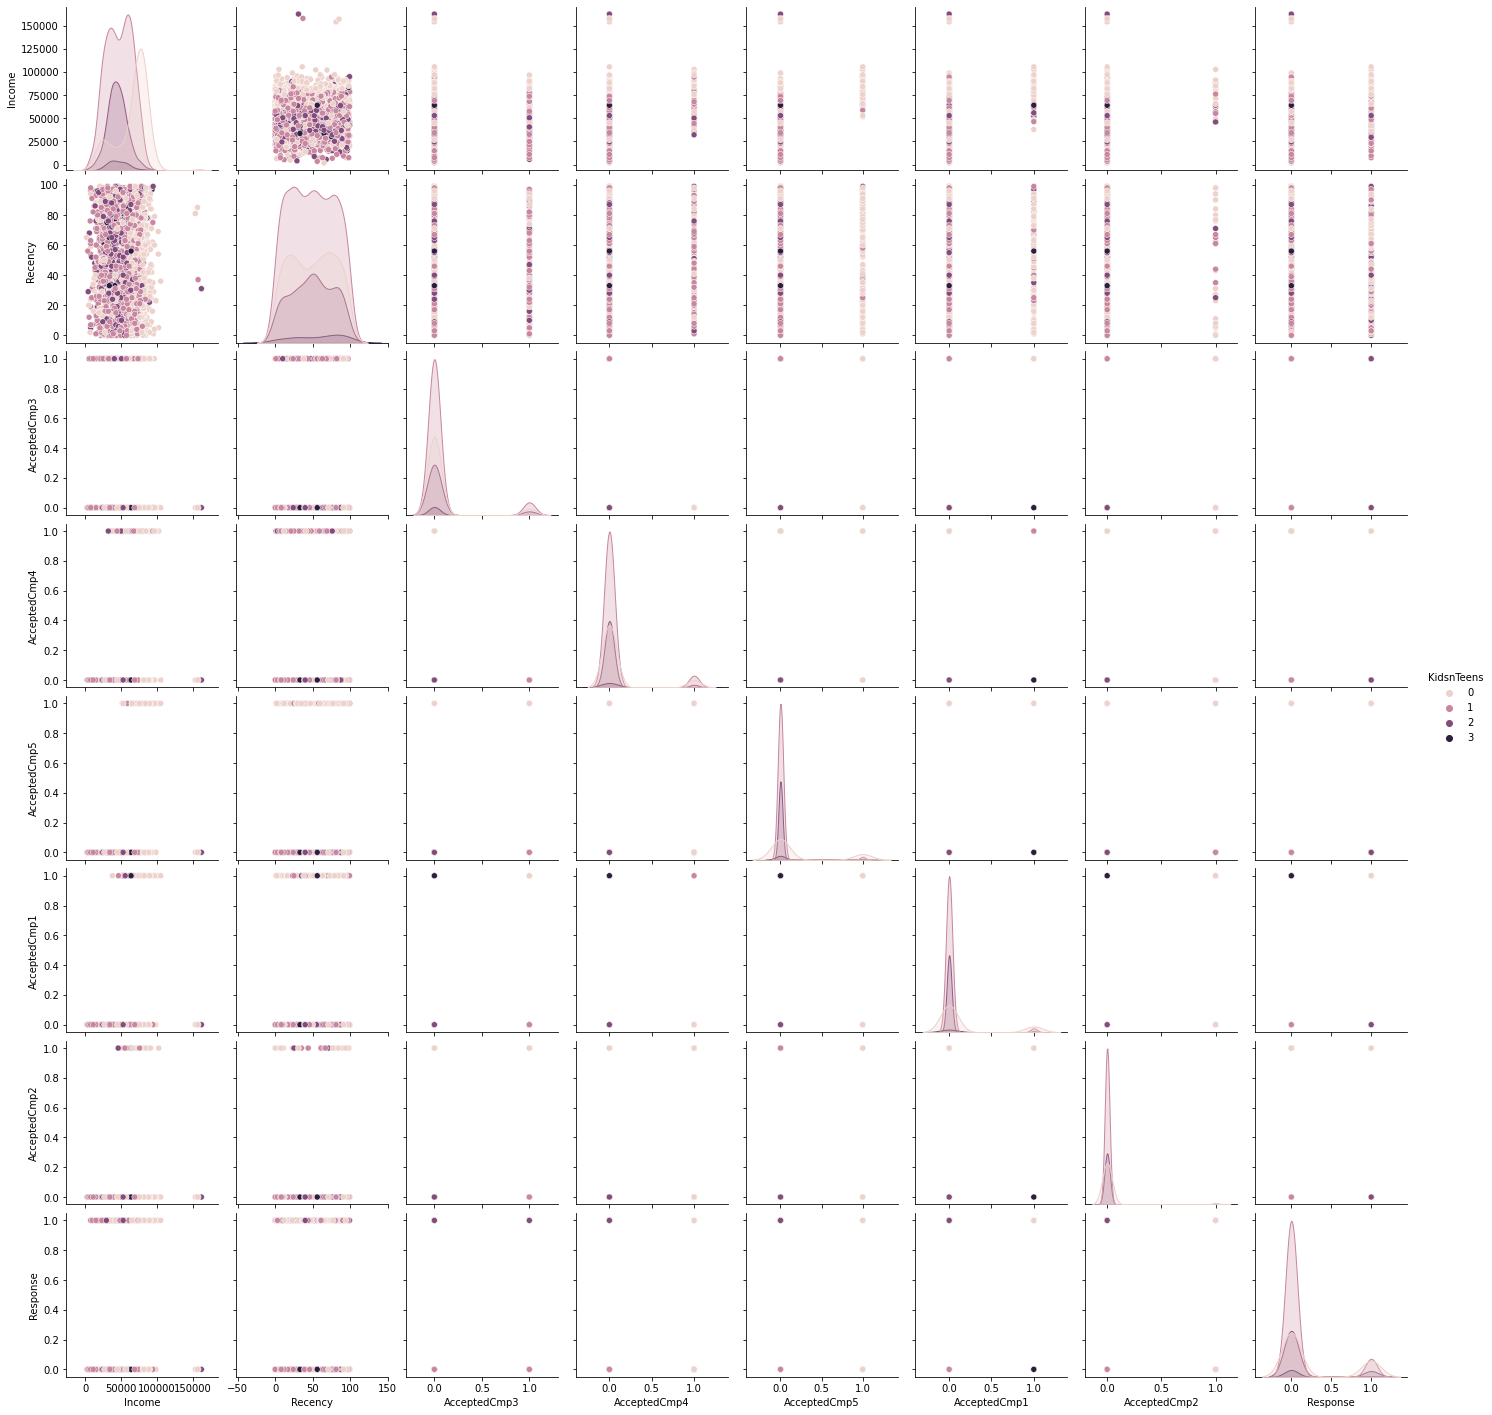

In [198]:
cols=['Income', 'KidsnTeens', 'Recency', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response']
sns.pairplot(new_df[cols],hue='KidsnTeens')

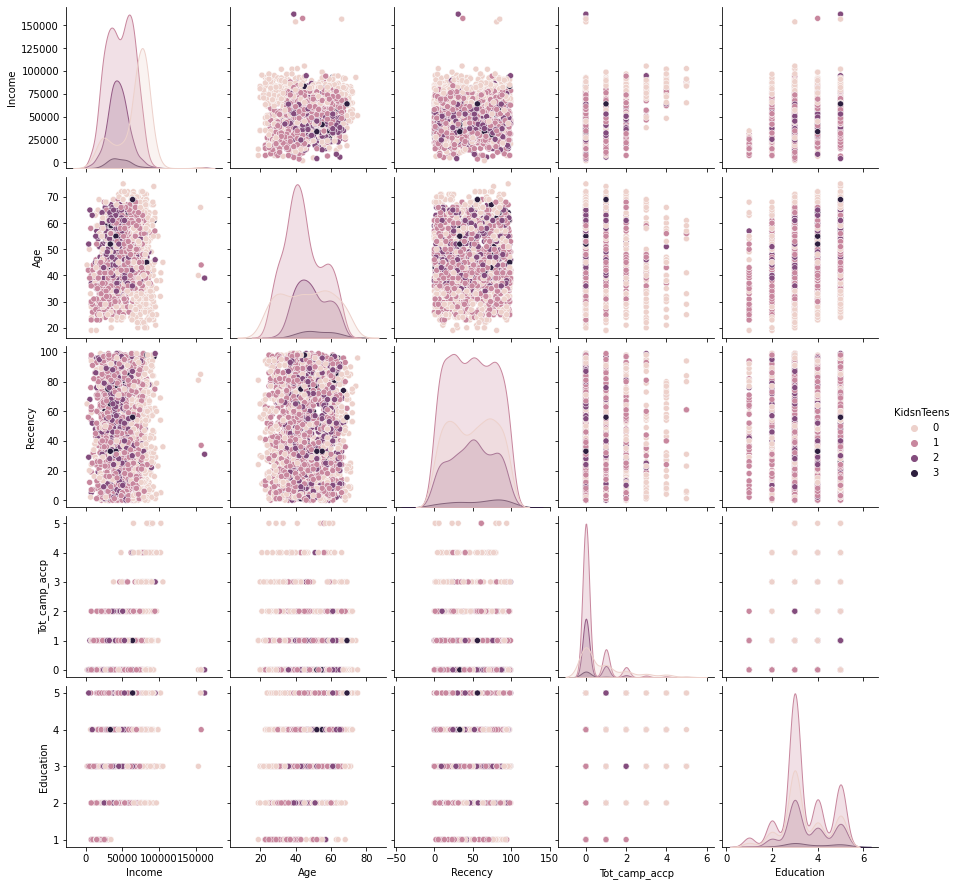

In [245]:
cols=['Income', 'KidsnTeens','Age','Recency','Tot_camp_accp','Education']
sns.pairplot(new_df[cols],hue='KidsnTeens')

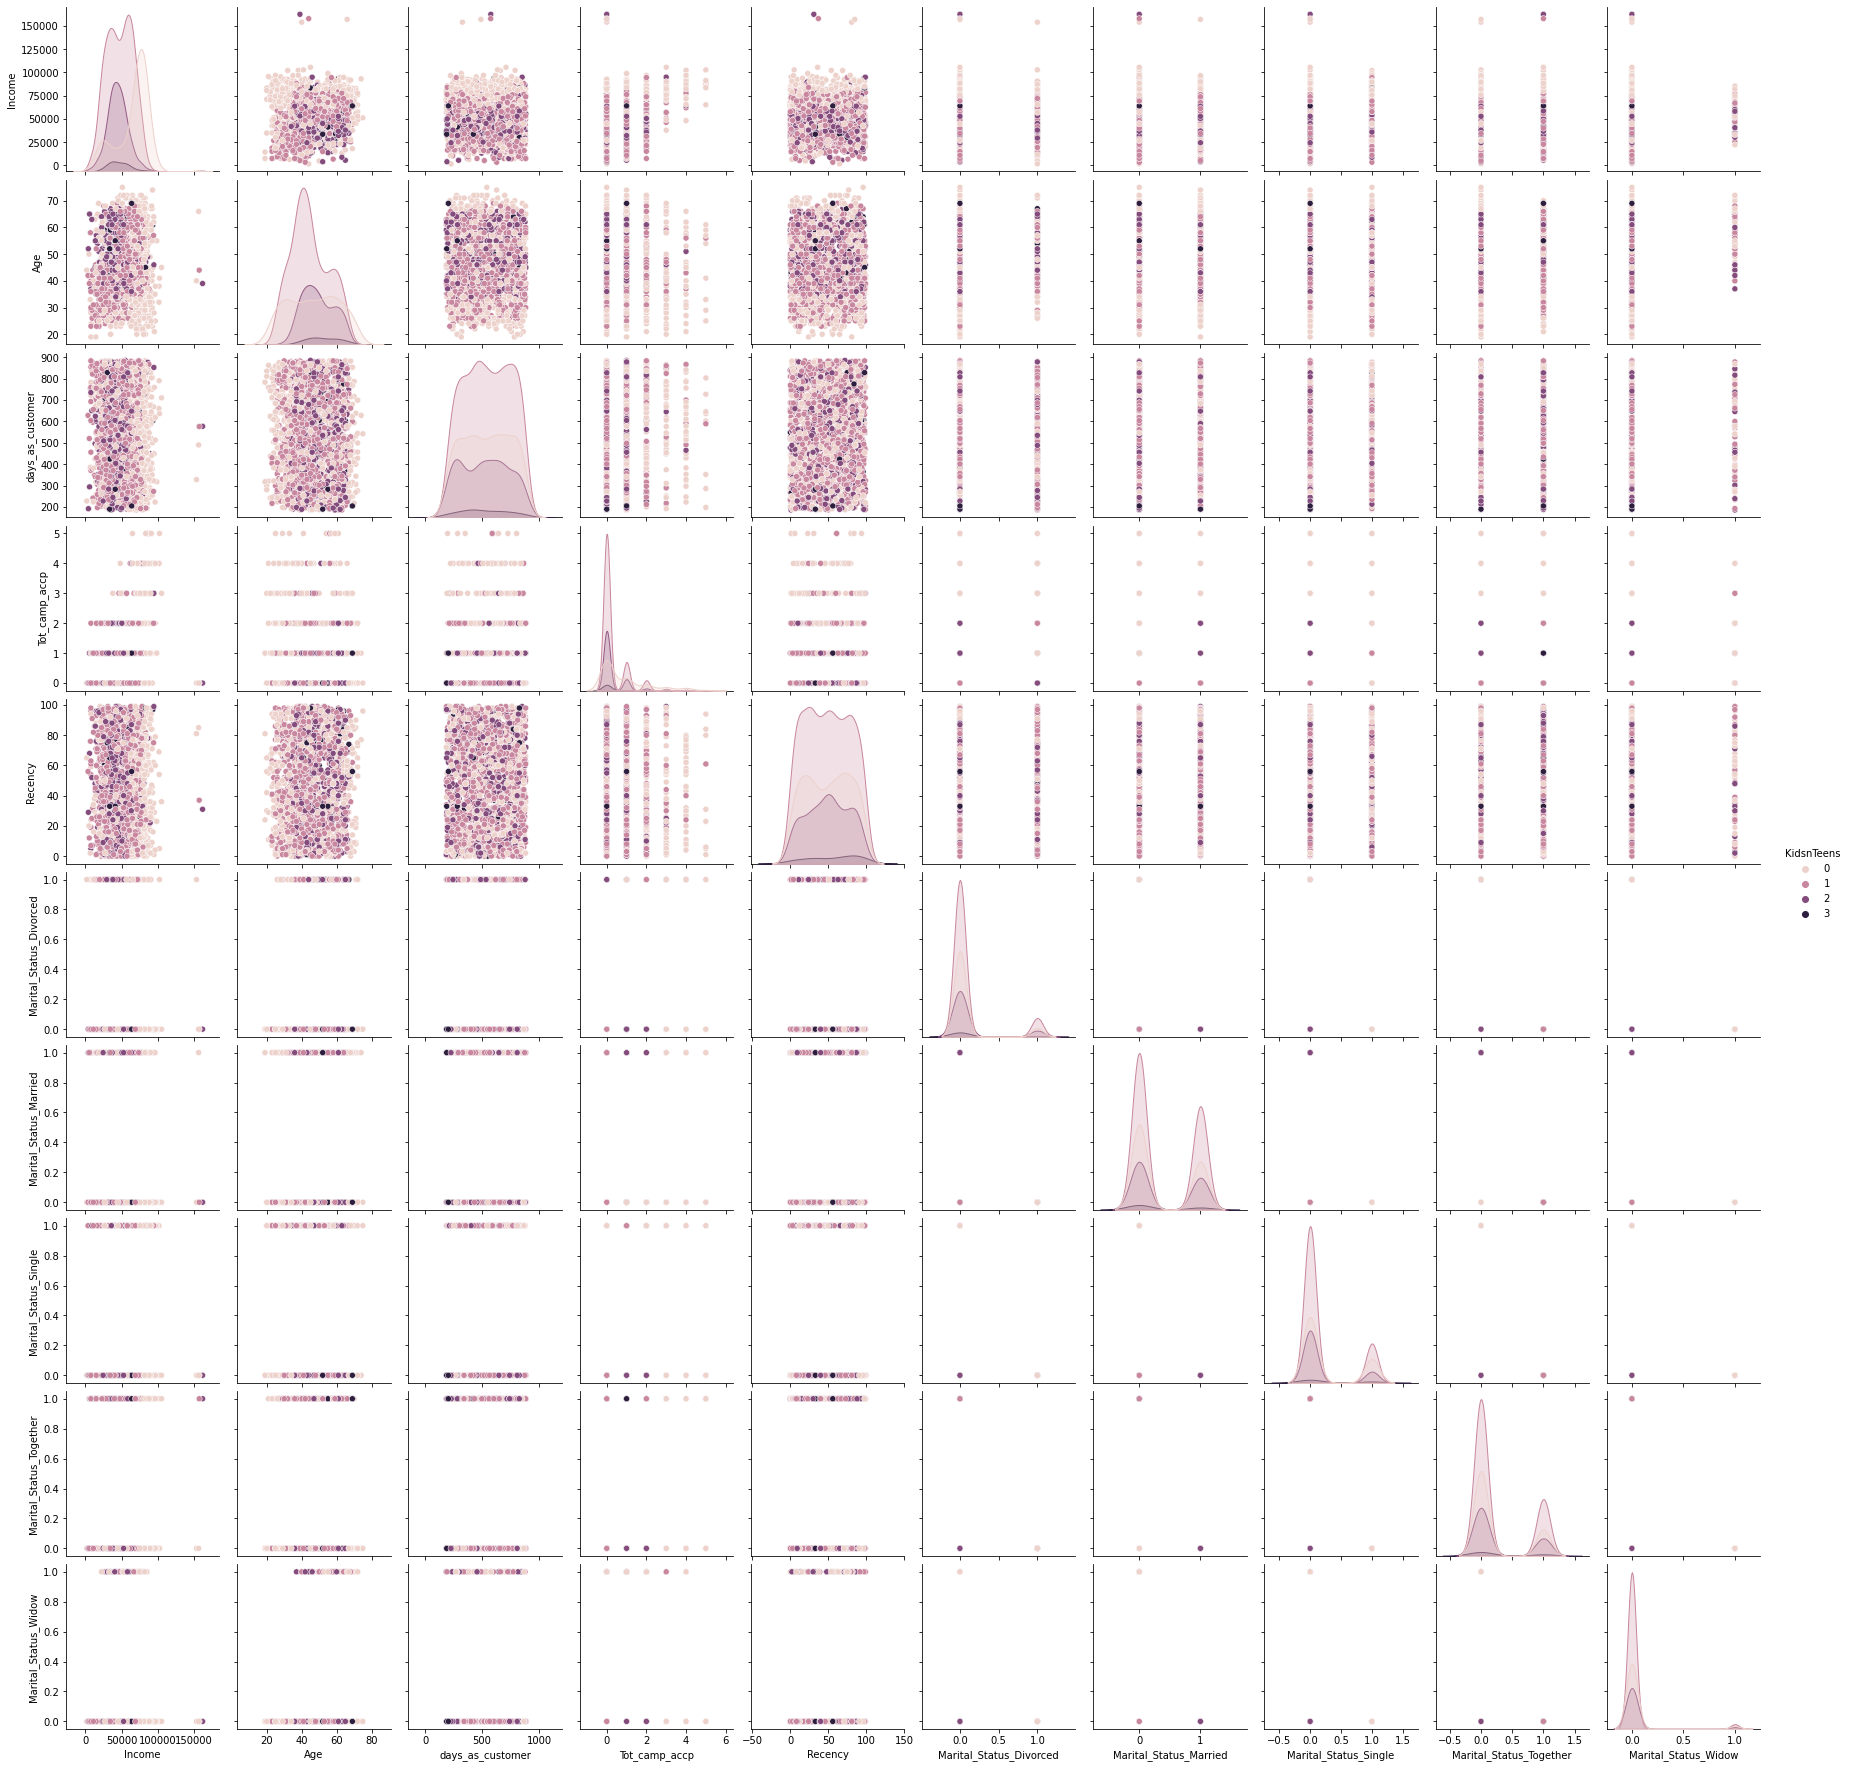

In [203]:
cols=['Income','Age','days_as_customer','KidsnTeens','Tot_camp_accp','Recency','Marital_Status_Divorced', 'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Together','Marital_Status_Widow']
sns.pairplot(new_df[cols],hue='KidsnTeens')

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='NumDealsPurchases'>

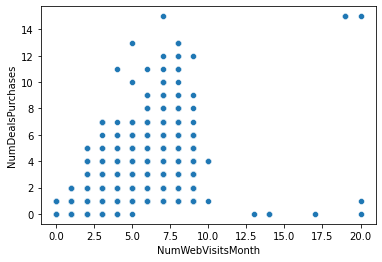

In [207]:
sns.scatterplot(data=new_df, y="NumDealsPurchases", x="NumWebVisitsMonth")

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='NumWebPurchases'>

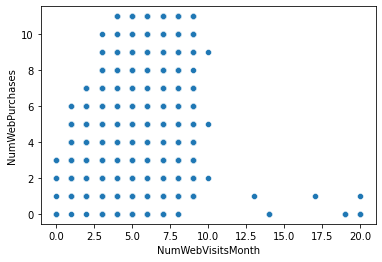

In [208]:
sns.scatterplot(data=new_df, x="NumWebVisitsMonth", y="NumWebPurchases")

In [ ]:
see more visualization (pairplots, etc, response campaigns)

<AxesSubplot:xlabel='KidsnTeens', ylabel='NumDealsPurchases'>

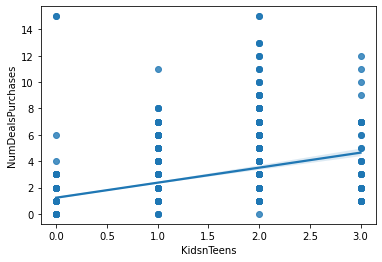

In [209]:
sns.regplot(data=new_df, x="KidsnTeens", y="NumDealsPurchases")

<AxesSubplot:xlabel='Tot_camp_accp', ylabel='NumDealsPurchases'>

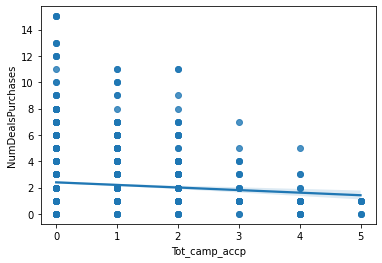

In [213]:
sns.regplot(data=new_df, x="Tot_camp_accp", y="NumDealsPurchases")

Text(0.5, 1.0, 'Valuations of discount on income and age')

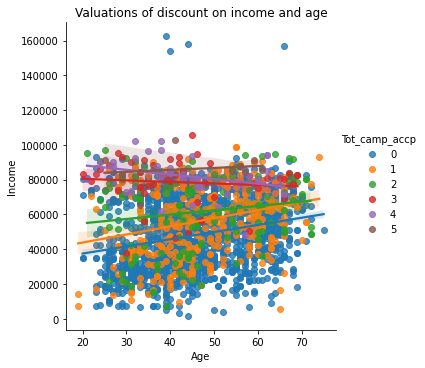

In [212]:
sns.lmplot(x="Age", y="Income", hue="Tot_camp_accp", data=new_df)
plt.title('Valuations of discount on income and age')

/Users/Lorena/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 40.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Lorena/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Lorena/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 90.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Lorena/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 75.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Lorena/opt/anaconda3/lib/python3.7/site-packa

Text(0.5, 1.0, 'Deals purchases by Education level')

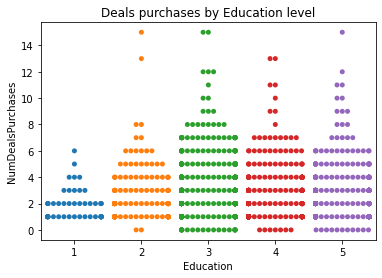

In [246]:
sns.swarmplot(x=new_df['Education'], y=new_df['NumDealsPurchases'])
plt.title('Deals purchases by Education level')

/Users/Lorena/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Lorena/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 81.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Lorena/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 94.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Lorena/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 87.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/Lorena/opt/anaconda3/lib/python3.7/site-packa

Text(0.5, 1.0, 'Campaigns accepted by Education level')

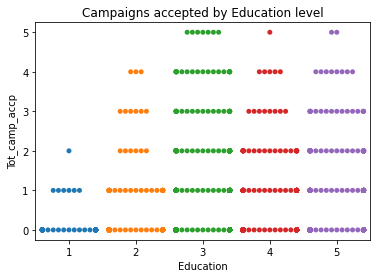

In [247]:
sns.swarmplot(x=new_df['Education'], y=new_df['Tot_camp_accp'])
plt.title('Campaigns accepted by Education level')

### 4. Summary of training at least three variations of the unsupervised model you selected. For example, you can use different clustering techniques or different hyperparameters.

First, I used **min max scaling** to preprocess the dataset given that when working with distances models are scale sensitive.

I tried three models, **Kmeans, Agglomerative Clustering and DBSCAN**.

First I tried Kmeans, having plotted inertia versus possible Ks, it was difficult with the elbow method to identify the best K. 
That is why I tried **GridSearchCV** and K=5 was thrown as the best parameter.

From there, I tried to follow the analysis for the rest of the models with the same number of clusters.

Having predicted the cluster identification for each of these models, I added a column to the original dataset to reflect the name of the cluster for each one of the models "agglom5"(Agglomerative clustering),'db_cluster'(DBSCAN) and '5_clusters' for Kmeans

**Grouping by cluster**, for each one these models, I calculated the average of features and size of clusters and dived into the outcome to find patterns and identify possible segments of customers.



In [249]:
new_df.head()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0          3  58138.0        0         0       58       635         88   
1          3  46344.0        1         1       38        11          1   
2          3  71613.0        0         0       26       426         49   
3          3  26646.0        1         0       26        11          4   
4          5  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              546              172                88            88   
1                6                2                 1             6   
2              127              111                21            42   
3               20               10                 3             5   
4              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response  Marital_Status_Divorced  \
0             0         0         1                        0   
1             0         0         0                        0   
2             0         0         0                        0   
3             0         0         0                        0   
4             0         0         0                        0   

   Marital_Status_Married  Marital_Status_Single  Marital_Status_Together  \
0                       0                      1                        0   
1                       0                      1                        0   
2                       0                      0                        1   
3                       0                      0                        1   
4                       1                      0                        0   

   Marital_Status_Widow  Education_ord  Age  days_as_customer  KidsnTeens  \
0                     0              3   58               849           0   
1                     0              3   61               299           2   
2                     0              3   50               498           0   
3                     0              3   31               325           1   
4                     0              5   34               347           1   

   Tot_camp_accp  
0              1  
1              0  
2              0  
3              0  
4              0

In [248]:
from sklearn.preprocessing import MinMaxScaler
X=new_df
mms=MinMaxScaler()
mms.fit(X)
X=mms.transform(X)

array([[0.5       , 0.35108641, 0.        , ..., 0.94849785, 0.        ,
        0.2       ],
       [0.5       , 0.27767992, 0.5       , ..., 0.16165951, 0.66666667,
        0.        ],
       [0.5       , 0.43495553, 0.        , ..., 0.44635193, 0.        ,
        0.        ],
       ...,
       [0.5       , 0.34388518, 0.        , ..., 0.22174535, 0.        ,
        0.2       ],
       [0.75      , 0.42021697, 0.        , ..., 0.22317597, 0.33333333,
        0.        ],
       [1.        , 0.31829187, 0.5       , ..., 0.88984263, 0.66666667,
        0.2       ]])

In [251]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Inertia')

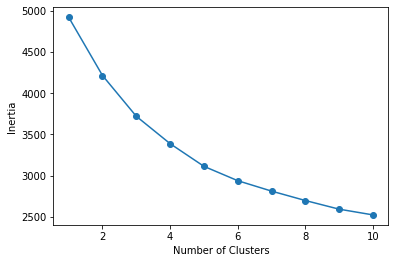

In [252]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [253]:
km4 = KMeans(n_clusters=4)
km4.fit(X)
y=km4.predict(X)

In [255]:
cluster=pd.Series(y)
new_df['cluster']=cluster

In [257]:
new_df['cluster'].value_counts()

2.0    759
1.0    660
0.0    533
3.0    264
Name: cluster, dtype: int64

In [262]:
new_df.groupby(['cluster']).mean()

Education        Income   Kidhome  Teenhome    Recency    MntWines  \
cluster                                                                       
0.0       3.484053  50922.364922  0.482176  0.538462  46.333959  289.084428   
1.0       3.465152  51801.285844  0.416667  0.513636  50.701515  316.333333   
2.0       3.424242  52485.255367  0.434783  0.487484  49.978920  303.911726   
3.0       3.496212  52375.630203  0.462121  0.484848  48.526515  312.988636   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
cluster                                                                  
0.0      25.898687       156.844278        37.911820         24.594747   
1.0      24.384848       162.466667        36.507576         26.874242   
2.0      28.280632       169.604743        37.239789         27.961792   
3.0      27.303030       168.469697        42.087121         29.405303   

         MntGoldProds  NumDealsPurchases  NumWebPurchases  \
cluster                                                     
0.0         42.161351           2.378987         4.163227   
1.0         43.019697           2.266667         4.030303   
2.0         44.869565           2.214756         4.028986   
3.0         45.056818           2.583333         3.992424   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
cluster                                                              
0.0                 2.506567           5.641651           5.525328   
1.0                 2.662121           5.893939           5.307576   
2.0                 2.598155           5.865613           5.216074   
3.0                 2.882576           5.840909           5.352273   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
cluster                                                                         
0.0          0.090056      0.063790      0.060038      0.060038      0.013133   
1.0          0.065152      0.086364      0.068182      0.065152      0.018182   
2.0          0.065876      0.076416      0.081686      0.065876      0.007905   
3.0          0.079545      0.060606      0.087121      0.068182      0.018939   

         Complain  Response  Marital_Status_Divorced  Marital_Status_Married  \
cluster                                                                        
0.0      0.013133  0.146341                 0.103189                0.395872   
1.0      0.006061  0.143939                 0.095455                0.372727   
2.0      0.009223  0.151515                 0.096179                0.404480   
3.0      0.007576  0.170455                 0.147727                0.348485   

         Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
cluster                                                                         
0.0                   0.172608                 0.290807              0.037523   
1.0                   0.222727                 0.271212              0.037879   
2.0                   0.222661                 0.242424              0.034256   
3.0                   0.268939                 0.212121              0.022727   

         Education_ord        Age  days_as_customer  KidsnTeens  Tot_camp_accp  
cluster                                                                         
0.0           3.484053  46.309568        535.699812    1.020638       0.433396  
1.0           3.465152  46.003030        544.869697    0.930303       0.446970  
2.0           3.424242  46.129117        539.891963    0.922266       0.449275  
3.0           3.496212  45.962121        533.265152    0.946970       0.484848

In [264]:
new_df.groupby(['cluster']).median()

Education   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
cluster                                                                        
0.0            3.0  51012.0      0.0       1.0     46.0     167.0        7.0   
1.0            3.0  51643.0      0.0       0.0     51.5     185.0        8.0   
2.0            3.0  51813.0      0.0       0.0     50.0     176.0        9.0   
3.0            3.0  51763.5      0.0       0.0     49.0     194.5        8.5   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
cluster                                                                     
0.0                 64.0             11.0               8.0          24.0   
1.0                 69.0             13.0               8.0          26.0   
2.0                 64.0             12.0               9.0          24.0   
3.0                 77.0             13.0               9.0          25.5   

         NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
cluster                                                            
0.0                    2.0              4.0                  2.0   
1.0                    2.0              4.0                  2.0   
2.0                    2.0              3.0                  2.0   
3.0                    2.0              3.0                  2.0   

         NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
cluster                                                                     
0.0                    5.0                6.0           0.0           0.0   
1.0                    5.0                6.0           0.0           0.0   
2.0                    5.0                6.0           0.0           0.0   
3.0                    5.0                6.0           0.0           0.0   

         AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
cluster                                                                 
0.0               0.0           0.0           0.0       0.0       0.0   
1.0               0.0           0.0           0.0       0.0       0.0   
2.0               0.0           0.0           0.0       0.0       0.0   
3.0               0.0           0.0           0.0       0.0       0.0   

         Marital_Status_Divorced  Marital_Status_Married  \
cluster                                                    
0.0                          0.0                     0.0   
1.0                          0.0                     0.0   
2.0                          0.0                     0.0   
3.0                          0.0                     0.0   

         Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
cluster                                                                         
0.0                        0.0                      0.0                   0.0   
1.0                        0.0                      0.0                   0.0   
2.0                        0.0                      0.0                   0.0   
3.0                        0.0                      0.0                   0.0   

         Education_ord   Age  days_as_customer  KidsnTeens  Tot_camp_accp  
cluster                                                                    
0.0                3.0  45.0             529.0         1.0            0.0  
1.0                3.0  45.0             547.5         1.0            0.0  
2.0                3.0  45.0             539.0         1.0            0.0  
3.0                3.0  45.0             542.5         1.0            0.0

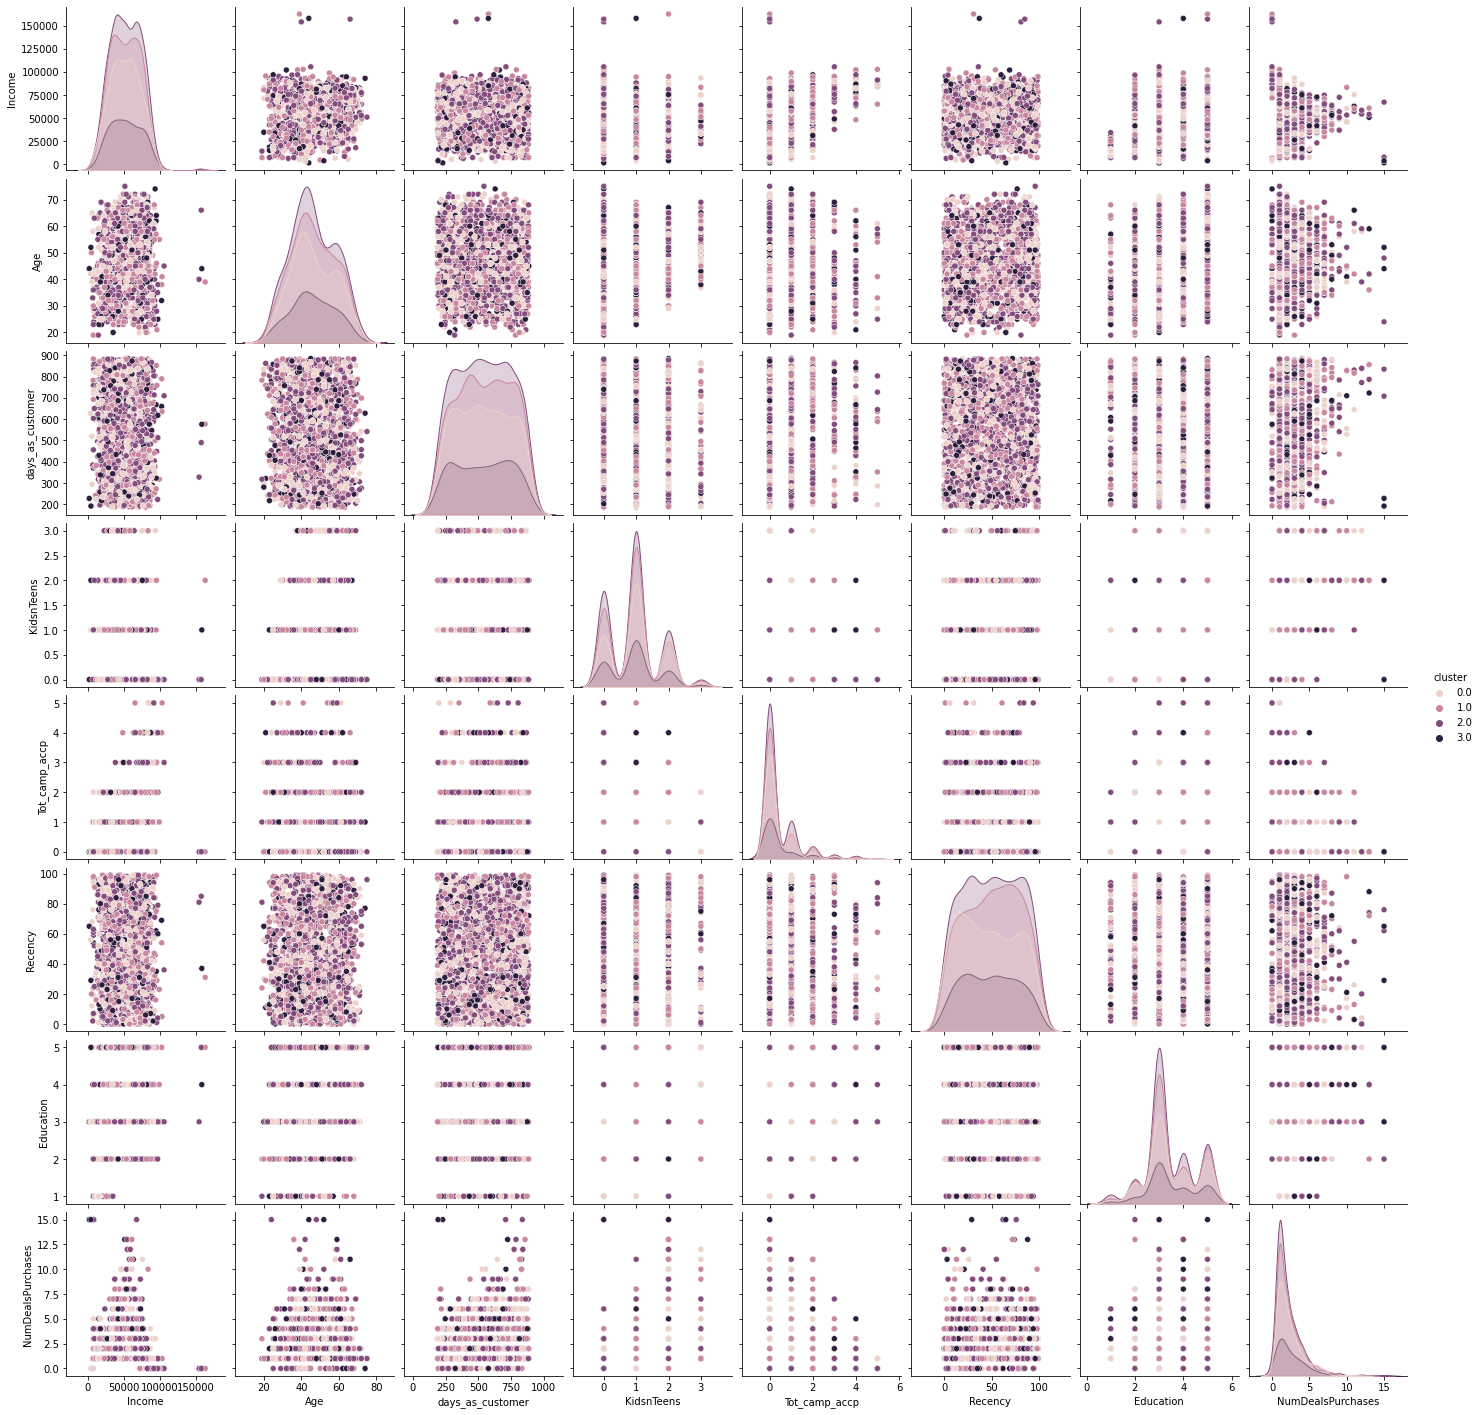

In [274]:
cols=['Income','Age','cluster','days_as_customer','KidsnTeens','Tot_camp_accp','Recency','Education','NumDealsPurchases']
sns.pairplot(new_df[cols],hue='cluster')

In [280]:
km3 = KMeans(n_clusters=3)
km3.fit(X)
y=km3.predict(X)
cluster=pd.Series(y)
new_df['3_cluster']=cluster


In [281]:
new_df.groupby(['3_cluster']).mean()

Education        Income   Kidhome  Teenhome    Recency    MntWines  \
3_cluster                                                                       
0.0         3.494774  51011.844083  0.470383  0.538328  46.841463  291.358885   
1.0         3.470812  51898.171358  0.427665  0.510152  50.091371  317.586294   
2.0         3.425059  52479.375672  0.441452  0.483607  49.818501  302.882904   

           MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
3_cluster                                                                  
0.0        26.033101       156.266551        38.515679         25.374564   
1.0        24.959391       165.124365        37.158629         27.002538   
2.0        28.056206       168.872365        37.809133         28.090164   

           MntGoldProds  NumDealsPurchases  NumWebPurchases  \
3_cluster                                                     
0.0           42.722997           2.385017         4.175958   
1.0           43.706853           2.309645         3.987310   
2.0           44.323185           2.269321         4.042155   

           NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
3_cluster                                                              
0.0                   2.531359           5.667247           5.501742   
1.0                   2.714467           5.883249           5.340102   
2.0                   2.615925           5.857143           5.215457   

           AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
3_cluster                                                           
0.0            0.092334      0.059233      0.060976      0.060976   
1.0            0.067259      0.083756      0.071066      0.063452   
2.0            0.065574      0.076112      0.083138      0.067916   

           AcceptedCmp2  Complain  Response  Marital_Status_Divorced  \
3_cluster                                                              
0.0            0.012195  0.012195  0.153310                 0.109756   
1.0            0.017766  0.006345  0.153553                 0.102792   
2.0            0.010539  0.009368  0.145199                 0.100703   

           Marital_Status_Married  Marital_Status_Single  \
3_cluster                                                  
0.0                      0.388502               0.181185   
1.0                      0.378173               0.230964   
2.0                      0.392272               0.225995   

           Marital_Status_Together  Marital_Status_Widow        Age  \
3_cluster                                                             
0.0                       0.283972              0.036585  46.296167   
1.0                       0.252538              0.035533  46.002538   
2.0                       0.248244              0.032787  46.097190   

           days_as_customer  KidsnTeens  Tot_camp_accp  
3_cluster                                               
0.0              535.404181    1.008711       0.439024  
1.0              546.116751    0.937817       0.456853  
2.0              536.346604    0.925059       0.448478

In [292]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
#sets up custom scorer
def s2(estimator,X):
    return silhouette_score(X,estimator.predict(X))

# list of values for n clusters
param=range(2,10)

km=KMeans(random_state=0,init='k-means++')

#sets up GridSearchCV object and stores in grid variable

grid=GridSearchCV(
km,
{'n_clusters':param},
scoring=s2,
cv=2)

grid.fit(X)

# accesses the optimum model
best_km=grid.best_estimator_

# displays the optimum model
best_km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 5,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

In [293]:
new_df['5_clusters']=grid.predict(X)
new_df.groupby(['5_clusters']).mean()

Education        Income   Kidhome  Teenhome    Recency  \
5_clusters                                                           
0            3.442593  49804.812638  0.481481  0.562963  50.037037   
1            3.561576  80597.364078  0.039409  0.123153  47.073892   
2            3.559140  51365.903226  0.401434  0.648746  49.139785   
3            3.439791  48213.488140  0.505236  0.556283  48.617801   
4            3.405896  47790.641012  0.510204  0.439909  49.993197   

              MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
5_clusters                                                            
0           264.818519  22.192593       137.259259        35.187037   
1           823.024631  64.177340       502.137931        89.206897   
2           293.784946  25.333333       132.379928        34.792115   
3           238.972513  21.074607       115.146597        28.764398   
4           238.537415  23.900227       145.358277        34.226757   

            MntSweetProducts  MntGoldProds  NumDealsPurchases  \
5_clusters                                                      
0                  22.438889     39.644444           2.431481   
1                  70.482759     76.280788           1.103448   
2                  25.827957     44.924731           2.530466   
3                  22.057592     38.552356           2.488220   
4                  21.603175     41.857143           2.294785   

            NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
5_clusters                                                            
0                  4.009259             2.342593           5.590741   
1                  5.620690             6.305419           8.147783   
2                  4.318996             2.573477           5.792115   
3                  3.850785             2.057592           5.609948   
4                  3.594104             2.297052           5.399093   

            NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
5_clusters                                                                
0                    5.462963      0.059259      0.044444      0.018519   
1                    3.059113      0.182266      0.334975      0.714286   
2                    5.587814      0.068100      0.057348      0.003584   
3                    5.630890      0.054974      0.048429      0.003927   
4                    5.569161      0.074830      0.047619      0.006803   

            AcceptedCmp1  AcceptedCmp2  Complain  Response  \
5_clusters                                                   
0               0.024074      0.009259  0.009259  0.075926   
1               0.517241      0.098522  0.004926  0.660099   
2               0.014337      0.000000  0.003584  0.154122   
3               0.019634      0.003927  0.010471  0.058901   
4               0.015873      0.004535  0.011338  0.160998   

            Marital_Status_Divorced  Marital_Status_Married  \
5_clusters                                                    
0                          0.000000                0.000000   
1                          0.073892                0.472906   
2                          0.774194                0.000000   
3                          0.000000                1.000000   
4                          0.000000                0.000000   

            Marital_Status_Single  Marital_Status_Together  \
5_clusters                                                   
0                        0.000000                  1.00000   
1                        0.206897                  0.17734   
2                        0.000000                  0.00000   
3                        0.000000                  0.00000   
4                        1.000000                  0.00000   

            Marital_Status_Widow        Age  days_as_customer  KidsnTeens  \
5_clusters                                                                  
0                       0.000000  47.188889        541.683333    1.044444   


In [284]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_full_tree=True)
ag = ag.fit(X)
new_df['agglom'] = ag.fit_predict(X)

In [285]:
new_df.groupby(['agglom']).mean()

Education        Income   Kidhome  Teenhome    Recency    MntWines  \
agglom                                                                       
0        3.493460  53710.681594  0.407848  0.464923  48.902497  344.372176   
1        3.437731  49920.304948  0.478422  0.531443  48.651048  263.572133   
2        3.441739  51898.570130  0.452174  0.533913  50.250435  306.848696   

        MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
agglom                                                                  
0       29.222354       189.909631        41.035672         28.820452   
1       24.261406       138.951911        33.272503         25.580764   
2       25.163478       161.146087        38.942609         26.132174   

        MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
agglom                                                                          
0          46.922711           2.202140         4.104637             2.898930   
1          41.097411           2.419236         3.983970             2.341554   
2          42.692174           2.333913         4.095652             2.627826   

        NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
agglom                                                                     
0                5.931034           5.234245      0.086801      0.101070   
1                5.741060           5.480888      0.066584      0.048089   
2                5.760000           5.288696      0.062609      0.073043   

        AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
agglom                                                                 
0           0.114150      0.098692      0.019025  0.008323  0.253270   
1           0.029593      0.035758      0.003699  0.009864  0.076449   
2           0.073043      0.055652      0.019130  0.008696  0.102609   

        Marital_Status_Divorced  Marital_Status_Married  \
agglom                                                    
0                      0.274673                0.058264   
1                      0.000000                1.000000   
2                      0.000000                0.000000   

        Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
agglom                                                                         
0                    0.574316                 0.001189              0.091558   
1                    0.000000                 0.000000              0.000000   
2                    0.000000                 1.000000              0.000000   

              Age  days_as_customer  KidsnTeens  Tot_camp_accp  3_cluster  
agglom                                                                     
0       45.991677        542.598098    0.872771       0.673008   1.156699  
1       45.489519        535.257707    1.009864       0.260173   1.125155  
2       47.187826        541.526957    0.986087       0.386087   1.083770

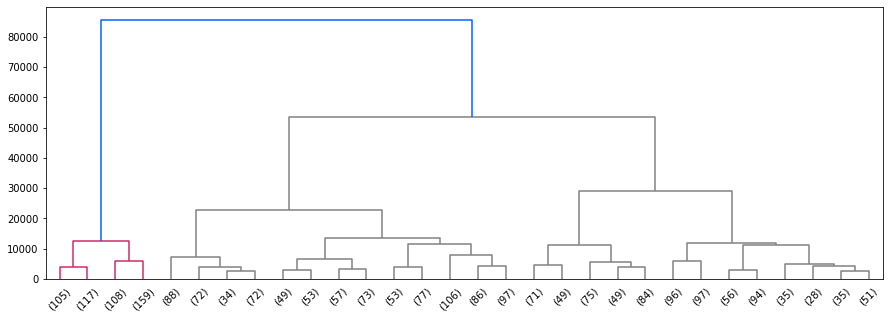

In [291]:
from colorsetup import colors, palette
sns.set_palette(palette)
from scipy.cluster import hierarchy

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax)

In [294]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=5, linkage='ward', compute_full_tree=True)
ag = ag.fit(X)
new_df['agglom5'] = ag.fit_predict(X)

In [295]:
new_df.groupby(['agglom5']).mean()

Education        Income   Kidhome  Teenhome    Recency    MntWines  \
agglom5                                                                       
0         3.437731  49920.304948  0.478422  0.531443  48.651048  263.572133   
1         3.563758  53020.726625  0.379195  0.617450  49.291946  319.224832   
2         3.441739  51898.570130  0.452174  0.533913  50.250435  306.848696   
3         3.379227  46464.830160  0.541063  0.461353  50.500000  212.451691   
4         3.697674  78558.658915  0.046512  0.124031  42.875969  825.837209   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
agglom5                                                                  
0        24.261406       138.951911        33.272503         25.580764   
1        26.993289       154.147651        37.402685         28.093960   
2        25.163478       161.146087        38.942609         26.132174   
3        21.374396       128.000000        30.927536         18.765700   
4        59.558140       471.209302        81.868217         62.767442   

         MntGoldProds  NumDealsPurchases  NumWebPurchases  \
agglom5                                                     
0           41.097411           2.419236         3.983970   
1           47.124161           2.453020         4.348993   
2           42.692174           2.333913         4.095652   
3           39.922705           2.323671         3.480676   
4           68.922481           1.232558         5.542636   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
agglom5                                                              
0                   2.341554           5.741060           5.480888   
1                   2.734899           5.899329           5.409396   
2                   2.627826           5.760000           5.288696   
3                   2.091787           5.260870           5.644928   
4                   5.868217           8.155039           3.511628   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
agglom5                                                                         
0            0.066584      0.048089      0.029593      0.035758      0.003699   
1            0.067114      0.077181      0.046980      0.033557      0.003356   
2            0.062609      0.073043      0.073043      0.055652      0.019130   
3            0.074879      0.045894      0.000000      0.019324      0.004831   
4            0.170543      0.333333      0.635659      0.503876      0.100775   

         Complain  Response  Marital_Status_Divorced  Marital_Status_Married  \
agglom5                                                                        
0        0.009864  0.076449                 0.000000                1.000000   
1        0.003356  0.191275                 0.741611                0.000000   
2        0.008696  0.102609                 0.000000                0.000000   
3        0.012077  0.111111                 0.000000                0.000000   
4        0.007752  0.852713                 0.077519                0.379845   

         Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
agglom5                                                                         
0                     0.000000                 0.000000              0.000000   
1                     0.000000                 0.000000              0.258389   
2                     0.000000                 1.000000              0.000000   
3                     1.000000                 0.000000              0.000000   
4                     0.534884                 0.007752              0.000000   

               Age  days_as_customer  KidsnTeens  Tot_camp_accp  3_cluster  \
agglom5                                                                      
0        45.489519        535.257707    1.009864       0.260173   1.125155   
1        50.590604        547.822148    0.996644       0.419463   1.094276   
2       

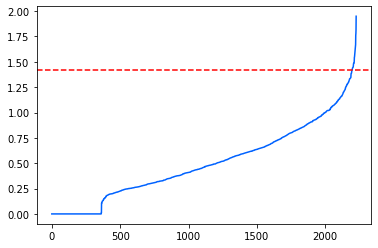

In [329]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np

k=5

nn=NearestNeighbors(n_neighbors=k).fit(X)

dist, ind= nn.kneighbors(X)

# sort distances
dist=np.sort(dist,axis=0)[:,1]

plt.plot(dist)
plt.axhline(y=1.415,color='red',ls='--')

In [327]:
db=DBSCAN(eps=1.415,min_samples=k).fit(X)
new_df['db_cluster']=db.fit_predict(X)

In [328]:
new_df.groupby(['db_cluster']).mean()

Education        Income   Kidhome  Teenhome    Recency  \
db_cluster                                                           
-1           3.392157  77420.155057  0.078431  0.352941  56.450980   
 0           3.454037  50875.845833  0.462030  0.502798  49.650679   
 1           3.456471  51290.074485  0.460000  0.510588  48.058824   
 2           3.671429  54813.200000  0.257143  0.685714  47.828571   
 3           3.200000  94026.000000  0.000000  0.000000  57.400000   

              MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
db_cluster                                                            
-1          840.274510  57.490196       376.784314        86.921569   
 0          289.012790  25.222222       159.944045        36.597122   
 1          292.388235  25.549412       154.290588        35.036471   
 2          314.885714  32.242857       162.900000        47.071429   
 3          966.200000  52.400000       641.400000       119.000000   

            MntSweetProducts  MntGoldProds  NumDealsPurchases  \
db_cluster                                                      
-1                 67.705882     88.137255           1.607843   
 0                 24.608313     42.325340           2.319744   
 1                 26.621176     42.001176           2.355294   
 2                 37.185714     51.271429           2.400000   
 3                108.200000    121.200000           0.400000   

            NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
db_cluster                                                            
-1                 5.450980             6.196078           7.882353   
 0                 3.962430             2.513989           5.676259   
 1                 4.061176             2.510588           5.858824   
 2                 4.600000             3.014286           6.257143   
 3                 5.800000             8.400000           7.000000   

            NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
db_cluster                                                                
-1                   4.078431      0.333333      0.549020      0.666667   
 0                   5.382094      0.066347      0.056755      0.047962   
 1                   5.389412      0.070588      0.065882      0.070588   
 2                   5.057143      0.042857      0.085714      0.042857   
 3                   2.400000      0.000000      1.000000      1.000000   

            AcceptedCmp1  AcceptedCmp2  Complain  Response  \
db_cluster                                                   
-1              0.725490      0.352941  0.019608  0.745098   
 0              0.035172      0.006395  0.008793  0.149480   
 1              0.065882      0.004706  0.009412  0.107059   
 2              0.028571      0.000000  0.000000  0.185714   
 3              1.000000      0.000000  0.000000  1.000000   

            Marital_Status_Divorced  Marital_Status_Married  \
db_cluster                                                    
-1                         0.196078                0.196078   
 0                         0.176659                0.000000   
 1                         0.000000                1.000000   
 2                         0.000000                0.000000   
 3                         0.000000                0.000000   

            Marital_Status_Single  Marital_Status_Together  \
db_cluster                                                   
-1                       0.235294                 0.235294   
 0                       0.376499                 0.446843   
 1                       0.000000                 0.000000   
 2                       0.000000                 0.000000   
 3                       0.000000                 1.000000   

            Marital_Status_Widow        Age  days_as_customer  KidsnTeens  \
db_cluster                                                                  
-1                      0.137255  45.921569        559.823529    0.431373   


In [330]:
new_df.groupby(['agglom5']).mean()

Education        Income   Kidhome  Teenhome    Recency    MntWines  \
agglom5                                                                       
0         3.437731  49920.304948  0.478422  0.531443  48.651048  263.572133   
1         3.563758  53020.726625  0.379195  0.617450  49.291946  319.224832   
2         3.441739  51898.570130  0.452174  0.533913  50.250435  306.848696   
3         3.379227  46464.830160  0.541063  0.461353  50.500000  212.451691   
4         3.697674  78558.658915  0.046512  0.124031  42.875969  825.837209   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
agglom5                                                                  
0        24.261406       138.951911        33.272503         25.580764   
1        26.993289       154.147651        37.402685         28.093960   
2        25.163478       161.146087        38.942609         26.132174   
3        21.374396       128.000000        30.927536         18.765700   
4        59.558140       471.209302        81.868217         62.767442   

         MntGoldProds  NumDealsPurchases  NumWebPurchases  \
agglom5                                                     
0           41.097411           2.419236         3.983970   
1           47.124161           2.453020         4.348993   
2           42.692174           2.333913         4.095652   
3           39.922705           2.323671         3.480676   
4           68.922481           1.232558         5.542636   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
agglom5                                                              
0                   2.341554           5.741060           5.480888   
1                   2.734899           5.899329           5.409396   
2                   2.627826           5.760000           5.288696   
3                   2.091787           5.260870           5.644928   
4                   5.868217           8.155039           3.511628   

         AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
agglom5                                                                         
0            0.066584      0.048089      0.029593      0.035758      0.003699   
1            0.067114      0.077181      0.046980      0.033557      0.003356   
2            0.062609      0.073043      0.073043      0.055652      0.019130   
3            0.074879      0.045894      0.000000      0.019324      0.004831   
4            0.170543      0.333333      0.635659      0.503876      0.100775   

         Complain  Response  Marital_Status_Divorced  Marital_Status_Married  \
agglom5                                                                        
0        0.009864  0.076449                 0.000000                1.000000   
1        0.003356  0.191275                 0.741611                0.000000   
2        0.008696  0.102609                 0.000000                0.000000   
3        0.012077  0.111111                 0.000000                0.000000   
4        0.007752  0.852713                 0.077519                0.379845   

         Marital_Status_Single  Marital_Status_Together  Marital_Status_Widow  \
agglom5                                                                         
0                     0.000000                 0.000000              0.000000   
1                     0.000000                 0.000000              0.258389   
2                     0.000000                 1.000000              0.000000   
3                     1.000000                 0.000000              0.000000   
4                     0.534884                 0.007752              0.000000   

               Age  days_as_customer  KidsnTeens  Tot_camp_accp  3_cluster  \
agglom5                                                                      
0        45.489519        535.257707    1.009864       0.260173   1.125155   
1        50.590604        547.822148    0.996644       0.419463   1.094276   
2       

In [334]:
new_df.groupby(['5_clusters']).mean()

Education        Income   Kidhome  Teenhome    Recency  \
5_clusters                                                           
0            3.442593  49804.812638  0.481481  0.562963  50.037037   
1            3.561576  80597.364078  0.039409  0.123153  47.073892   
2            3.559140  51365.903226  0.401434  0.648746  49.139785   
3            3.439791  48213.488140  0.505236  0.556283  48.617801   
4            3.405896  47790.641012  0.510204  0.439909  49.993197   

              MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
5_clusters                                                            
0           264.818519  22.192593       137.259259        35.187037   
1           823.024631  64.177340       502.137931        89.206897   
2           293.784946  25.333333       132.379928        34.792115   
3           238.972513  21.074607       115.146597        28.764398   
4           238.537415  23.900227       145.358277        34.226757   

            MntSweetProducts  MntGoldProds  NumDealsPurchases  \
5_clusters                                                      
0                  22.438889     39.644444           2.431481   
1                  70.482759     76.280788           1.103448   
2                  25.827957     44.924731           2.530466   
3                  22.057592     38.552356           2.488220   
4                  21.603175     41.857143           2.294785   

            NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
5_clusters                                                            
0                  4.009259             2.342593           5.590741   
1                  5.620690             6.305419           8.147783   
2                  4.318996             2.573477           5.792115   
3                  3.850785             2.057592           5.609948   
4                  3.594104             2.297052           5.399093   

            NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
5_clusters                                                                
0                    5.462963      0.059259      0.044444      0.018519   
1                    3.059113      0.182266      0.334975      0.714286   
2                    5.587814      0.068100      0.057348      0.003584   
3                    5.630890      0.054974      0.048429      0.003927   
4                    5.569161      0.074830      0.047619      0.006803   

            AcceptedCmp1  AcceptedCmp2  Complain  Response  \
5_clusters                                                   
0               0.024074      0.009259  0.009259  0.075926   
1               0.517241      0.098522  0.004926  0.660099   
2               0.014337      0.000000  0.003584  0.154122   
3               0.019634      0.003927  0.010471  0.058901   
4               0.015873      0.004535  0.011338  0.160998   

            Marital_Status_Divorced  Marital_Status_Married  \
5_clusters                                                    
0                          0.000000                0.000000   
1                          0.073892                0.472906   
2                          0.774194                0.000000   
3                          0.000000                1.000000   
4                          0.000000                0.000000   

            Marital_Status_Single  Marital_Status_Together  \
5_clusters                                                   
0                        0.000000                  1.00000   
1                        0.206897                  0.17734   
2                        0.000000                  0.00000   
3                        0.000000                  0.00000   
4                        1.000000                  0.00000   

            Marital_Status_Widow        Age  days_as_customer  KidsnTeens  \
5_clusters                                                                  
0                       0.000000  47.188889        541.683333    1.044444   


In [331]:
(new_df[['agglom5','5_clusters','db_cluster']]
 .groupby(['db_cluster'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
db_cluster        
-1              51
 0            1251
 1             850
 2              70
 3               5

In [332]:
(new_df[['agglom5','5_clusters','db_cluster']]
 .groupby(['5_clusters'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
5_clusters        
0              540
1              203
2              279
3              764
4              441

In [333]:
(new_df[['agglom5','5_clusters','db_cluster']]
 .groupby(['agglom5'])
 .size()
 .to_frame()
 .rename(columns={0:'number'}))

number
agglom5        
0           811
1           298
2           575
3           414
4           129

### 5. A paragraph explaining which of your Unsupervised Learning models you recommend as a final model that best fits your needs in terms.

KMeans and Agglomerative seem to have found very similar kind of clusters:
    
* Agglom cluster 0 similar to cluster 3 KMeans
* Agglom cluster 1 similar to cluster 2 KMeans
* Agglom cluster 2 similar to cluster 0 KMeans
* Agglom cluster 3 similar to cluaster 4 KMeans (lower income)
* Agglom cluster 4 similar to cluster 1 KMeans (Premium)

However, except for the "premium" cluster (Agglom 4 and 1 KMeans) with clearly higher income, higher education and low incidence of kids/teens, higher amount of purchases, etc, the rest of the clusters features (except for the marital status and age) are hard to differentiate one from the other. Just to mention some examples, number of kids and teens are similar, purchases patterns also, etc.

I think that **DBSCAN did a better job in finding clearly different clusters** with its own characteristics which helps to better describe the profile of each group of customers.The downside however is the size of the clusters in DBSCAN with a huge cluster 0 of lower income, with kids and teens, who take advantage of discounts very similar in pattern to the cluster 1 except for the marital status. This contrasts with a very small high income cluster of only 5 observations. 

Given the more balanced size of the clusters **I picked Agglomerative Clustering rather than DBSCAN** as the recommended final model.

### 6. Summary Key Findings and Insights, which walks your reader through the main findings of your modeling exercise.

I pick **Agglomerative Clustering** for the conclusion, key findings and insights, clusters are very similar to KMeans though.

**Premium segment** (cluster 4):
* Higher education and income
* no kids or teens mainly
* Higher level of purchases in general independently of the product
* Agnostic to discounts (low number of deals purchases)
* Very open to accept campaigns
* Younger clients compared to other segments (43 years old)
    
**Low tier segment** (cluster 3):
* Lowest education level and income
* Of the youngest segments also 43 years old and single
* Probably with kids rather than teens
* high recency and higher web visits
* Lower purchases of gold products
* Do not tend to accept campaigns offers
    
**Upper Mid segment** (cluster 1):
* Second best education and income level
* Probably with higher number of teens rather than kids
* Probably older (50 years) and divorced or widow
* higher level of gold products purchases right after the premium segment
* Highly attracted by discounts
* not as much interested in campaigns compared to the premium segment

**Mid segment** (cluster 2):
* With kids and teens, 47 years old
* Higher spending in meat and fish
* Marital status together
* Not much interested in campaigns
* Take advantage of discounts also

**Upper low segment** (cluster 0):
* Second lowest level of education and income
* Married with kids and teens, 45 years old
* Highly attracted to discounts
* Among the lowest campaign acceptance

### 7. Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model or adding specific data features to achieve a better model.

I think that not knowing exactly what the campaigns were about is a limiting factor in the analysis, given that it is difficult to know to what product or audience were targetted.
I think that it would be interesting to try new campaigns designed to allure the specific audience it is targetted to. Analyzing these outcomes would be helpful to validate if our conclusions are right.

Other ideas to try:
    
* Add frequency of purchases as a feature
* Add sex of the customer who makes the purchase
* Analyze the relationship among products (for instance if meat purchase is often accompanied by wine purchase)
    

